## Slug Test 
**This test is taken from examples of AQTESOLV.**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ttim

Set background parameters:

In [2]:
rw = 0.127  # well radius
rc = 0.0508  # well casing radius
L = 4.20624  # screen length
b = -9.9274  # aquifer thickness
zt = -0.1433  # depth to top of the screen
H0 = 0.4511  # initial displacement in the well
zb = zt - L  # bottom of the screen

Slug:

In [3]:
Q = np.pi * rc**2 * H0
print("Slug:", round(Q, 5), "m^3")

Slug: 0.00366 m^3


Load data:

In [19]:
data = np.loadtxt("data/falling_head.txt", skiprows=2)
t = data[:, 0] / 60 / 60 / 24  # convert time from seconds to days
h = (10 - data[:, 1]) * 0.3048  # convert drawdown from ft to meters

Create single layer conceptual model:

In [21]:
ml_0 = ttim.Model3D(kaq=10, z=[0, zt, zb, b], Saq=1e-4, tmin=1e-5, tmax=0.01)
w_0 = ttim.Well(
    ml_0, xw=0, yw=0, rw=rw, rc=rc, tsandQ=[(0, -Q)], layers=1, wbstype="slug"
)
ml_0.solve()

self.neq  1
solution complete


In [22]:
ca_0 = ttim.Calibrate(ml_0)
ca_0.set_parameter(name="kaq0_2", initial=10)
ca_0.set_parameter(name="Saq0_2", initial=1e-4)
ca_0.series(name="obs", x=0, y=0, t=t, h=h, layer=1)
ca_0.fit(report=True)

....................................................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 129
    # data points      = 27
    # variables        = 2
    chi-square         = 0.00905722
    reduced chi-square = 3.6229e-04
    Akaike info crit   = -212.000800
    Bayesian info crit = -209.409126
[[Variables]]
    kaq0_2:  1.33523687 +/- 0.05906434 (4.42%) (init = 10)
    Saq0_2:  2.1466e-10 +/- 2.5021e-10 (116.56%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0_2, Saq0_2) = -0.698


In [23]:
display(ca_0.parameters)
print("RMSE:", ca_0.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0_2,1.33524,5.906434e-02,4.42351,-inf,inf,10,"[1.3352368684147649, 1.3352368684147649, 1.335..."
Saq0_2,2.14664e-10,2.502106e-10,116.559,-inf,inf,0.0001,"[2.1466448974593843e-10, 2.1466448974593843e-1..."


RMSE: 0.018315367486363435


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


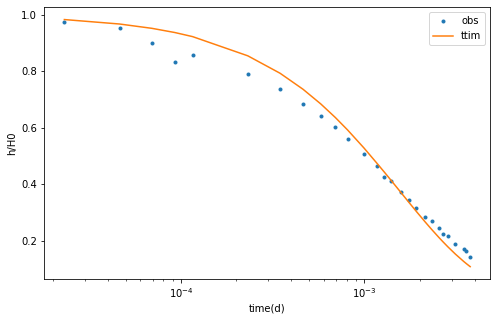

In [24]:
hm_0 = ml_0.head(0, 0, t, layers=1)
plt.figure(figsize=(8, 5))
plt.semilogx(t, h / H0, ".", label="obs")
plt.semilogx(t, hm_0[0] / H0, label="ttim")
plt.xlabel("time(d)")
plt.ylabel("h/H0")
plt.legend();

Try multilayer conceptual model:

In [25]:
# Determine elevation of each layer.
# Thickness of each layer is set to be 0.5 m.
z0 = np.arange(zt, zb, -0.5)
z1 = np.arange(zb, b, -0.5)
zlay = np.append(z0, z1)
zlay = np.append(zlay, b)
zlay = np.insert(zlay, 0, 0)
nlay = len(zlay) - 1  # number of layers
Saq_1 = 1e-4 * np.ones(nlay)
Saq_1[0] = 0.1

In [29]:
ml_1 = ttim.Model3D(
    kaq=10, z=zlay, Saq=Saq_1, kzoverkh=1, tmin=1e-5, tmax=0.01, phreatictop=True
)
w_1 = ttim.Well(
    ml_1,
    xw=0,
    yw=0,
    rw=rw,
    tsandQ=[(0, -Q)],
    layers=[1, 2, 3, 4, 5, 6, 7, 8],
    rc=rc,
    wbstype="slug",
)
ml_1.solve()

self.neq  8
solution complete


In [30]:
ca_1 = ttim.Calibrate(ml_1)
ca_1.set_parameter(name="kaq0_21", initial=10, pmin=0)
ca_1.set_parameter(name="Saq0_21", initial=1e-4, pmin=0)
ca_1.series(name="obs", x=0, y=0, layer=[1, 2, 3, 4, 5, 6, 7, 8], t=t, h=h)
ca_1.fit(report=True)

.........................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 38
    # data points      = 216
    # variables        = 2
    chi-square         = 0.00868193
    reduced chi-square = 4.0570e-05
    Akaike info crit   = -2182.30650
    Bayesian info crit = -2175.55594
[[Variables]]
    kaq0_21:  0.49532050 +/- 0.00771220 (1.56%) (init = 10)
    Saq0_21:  4.0620e-04 +/- 3.5550e-05 (8.75%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0_21, Saq0_21) = -0.959


In [31]:
display(ca_1.parameters)
print("RMSE:", ca_1.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0_21,0.495321,0.007712,1.55701,0,inf,10,"[0.4953205000476846, 0.4953205000476846, 0.495..."
Saq0_21,0.000406197,0.000036,8.7519,0,inf,0.0001,"[0.0004061971689826027, 0.0004061971689826027,..."


RMSE: 0.006339884853175206


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


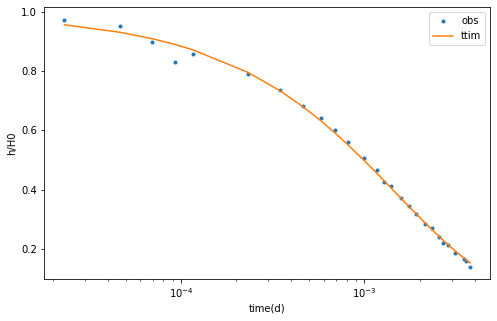

In [34]:
hm_1 = ml_1.head(0, 0, t, layers=8)
plt.figure(figsize=(8, 5))
plt.semilogx(t, h / H0, ".", label="obs")
plt.semilogx(t, hm_1[0] / H0, label="ttim")
plt.xlabel("time(d)")
plt.ylabel("h/H0")
plt.legend();

Try adding well screen resistance:

In [35]:
ml_2 = ttim.Model3D(
    kaq=10, z=zlay, Saq=Saq_1, kzoverkh=1, tmin=1e-5, tmax=0.01, phreatictop=True
)
w_2 = ttim.Well(
    ml_2,
    xw=0,
    yw=0,
    rw=rw,
    tsandQ=[(0, -Q)],
    layers=[1, 2, 3, 4, 5, 6, 7, 8],
    rc=rc,
    res=0.1,
    wbstype="slug",
)
ml_2.solve()

self.neq  8
solution complete


In [36]:
ca_2 = ttim.Calibrate(ml_2)
ca_2.set_parameter(name="kaq0_21", initial=10, pmin=0)
ca_2.set_parameter(name="Saq0_21", initial=1e-4, pmin=0)
ca_2.set_parameter_by_reference(name="res", parameter=w_2.res, initial=0, pmin=0)
ca_2.series(name="obs", x=0, y=0, layer=[1, 2, 3, 4, 5, 6, 7, 8], t=t, h=h)
ca_2.fit(report=True)

............................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 216
    # variables        = 3
    chi-square         = 0.00858106
    reduced chi-square = 4.0287e-05
    Akaike info crit   = -2182.83089
    Bayesian info crit = -2172.70506
[[Variables]]
    kaq0_21:  0.50749746 +/- 0.01052392 (2.07%) (init = 10)
    Saq0_21:  3.4727e-04 +/- 4.4651e-05 (12.86%) (init = 0.0001)
    res:      0.00233497 +/- 0.00143443 (61.43%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0_21, Saq0_21) = -0.977
    C(Saq0_21, res)     = -0.715
    C(kaq0_21, res)     =  0.674


In [37]:
display(ca_2.parameters)
print("RMSE:", ca_2.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0_21,0.507497,0.010524,2.07369,0,inf,10,"[0.50749745967107, 0.50749745967107, 0.5074974..."
Saq0_21,0.000347266,0.000045,12.8578,0,inf,0.0001,"[0.0003472655198073493, 0.0003472655198073493,..."
res,0.00233497,0.001434,61.4326,0,inf,0,[0.0023349682160858087]


RMSE: 0.006302945725154117


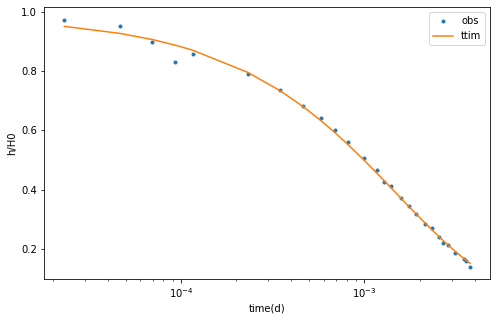

In [38]:
hm_2 = ml_2.head(0, 0, t, layers=8)
plt.figure(figsize=(8, 5))
plt.semilogx(t, h / H0, ".", label="obs")
plt.semilogx(t, hm_2[0] / H0, label="ttim")
plt.xlabel("time(d)")
plt.ylabel("h/H0")
plt.legend();

Optimized res is very close to the minimum limitation for res. Thus, resistance of well skin has little effect on model performance. 

## Summary of values presented in AQTESOLV:

In [39]:
t = pd.DataFrame(
    columns=["k [m/d]", "Ss [1/m]"], index=["AQTESOLV", "ttim-single", "ttim-multi"]
)
t.loc["AQTESOLV"] = [2.616, 7.894e-5]
t.loc["ttim-single"] = ca_0.parameters["optimal"].values
t.loc["ttim-multi"] = ca_1.parameters["optimal"].values
t["RMSE"] = [0.001197, round(ca_0.rmse(), 6), round(ca_1.rmse(), 6)]
t

,k [m/d],Ss [1/m],RMSE
AQTESOLV,2.616,7.894e-05,0.001197
ttim-single,1.33524,2.14664e-10,0.018315
ttim-multi,0.495321,0.000406197,0.006340
